![Image Alt Text](finance%20cover.png)

## Contents

[**1. Introduction**](#introduction)

[**2. Loading data**](#loading_data)
* [2.1. Importing libraries](#libraries)
* [2.2. Loading stock data](#stock)

[**3. Basic analysis of stock information**](#racial_diversity)
* [3.1. Closing price](#closing_price)
* [3.2. Trading volume](#trading_volume)
* [3.2. Moving average](#moving_average)
* [3.3. Daily returns](#daily_returns)


[**4. Risk analysis - Value at Risk**](#var)
* [4.1. Historical approach](#historical)
* [4.2. Parametric approach](#parametric)
* [4.3. Monte Carlo approach](#montecarlo)

[**5. Recommendations for future work**](#recommendations)

<a name="introduction"></a>
## 1. Introduction

Stock Market Analysis and Prediction is the project related to Exploratory data analysis (EDA), Data visualization and Predictive analysis using data, provided by The Investors Exchange (IEX). I looked at real-time financial data from the stock market. I have used python libraries to get stock information, visualize different aspects of it, and finally I worked at a few ways of analyzing the risk of a stock, based on its previous performance history. I have also used statistical method called Monte Carlo Method to predict future stock prices.

We'll be answering the following questions along the way:
* What was the change in price of the stock over time?*
* What was the daily return of the stock on average?*
* What was the moving average of the various stocks?*
* What was the correlation between different stocks' closing prices?*
* What was the correlation between different stocks' daily returns?*
* How much value do we put at risk by investing in a particular stock?*
* How can we attempt to predict future stock behavior?*

<a name="loading_data"></a>
## 2. Loading data

<a name="libraries"></a>
### 2.1. Importing libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime 
import yfinance as yf 
from scipy.stats import norm
from datetime import datetime
sns.set_style('dark')

<a name="stock"></a>
### 2.2. Loading stock data

In [24]:
end_date = datetime.now()
start_date = datetime(end_date.year - 1,end_date.month, end_date.day)

stocks = ['AAPL','AMZN','GOOG','MSFT']
company_colours = {
    'AAPL': '#d7372f',
    'AMZN': '#ecaa01',
    'GOOG': '#4bb0ac',
    'MSFT': '#00a100',
}

for stock in stocks:
    globals()[stock]  =  yf.download(stock, start = start_date, end = end_date);

display(AAPL.head(2))
display(AMZN.head(2))
display(GOOG.head(2))
display(MSFT.head(2))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.118835,70555800
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.205139,64015300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,99.529999,103.489998,99.529999,102.239998,102.239998,87775600
2023-01-30,101.089996,101.739998,99.010002,100.550003,100.550003,70691900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,99.050003,101.580002,98.970001,100.709999,100.709999,29020400
2023-01-30,98.745003,99.408997,97.519997,97.949997,97.949997,24365100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,248.990005,249.830002,246.830002,248.160004,245.978943,26498900
2023-01-30,244.509995,245.600006,242.199997,242.710007,240.576828,25867400


https://ypfsresourcelibrary.blob.core.windows.net/fcic/YPFS/Risk%20Metrics%20-%20VaR%20Statistics.pdf

https://nbviewer.org/github/anwarcsebd/stock-market-analysis/blob/master/stock-market-analysis.ipynb

<a name="loading_data"></a>
## 3. Basic analysis of stock information

<a name="closing_price"></a>
### 3.1. Closing price

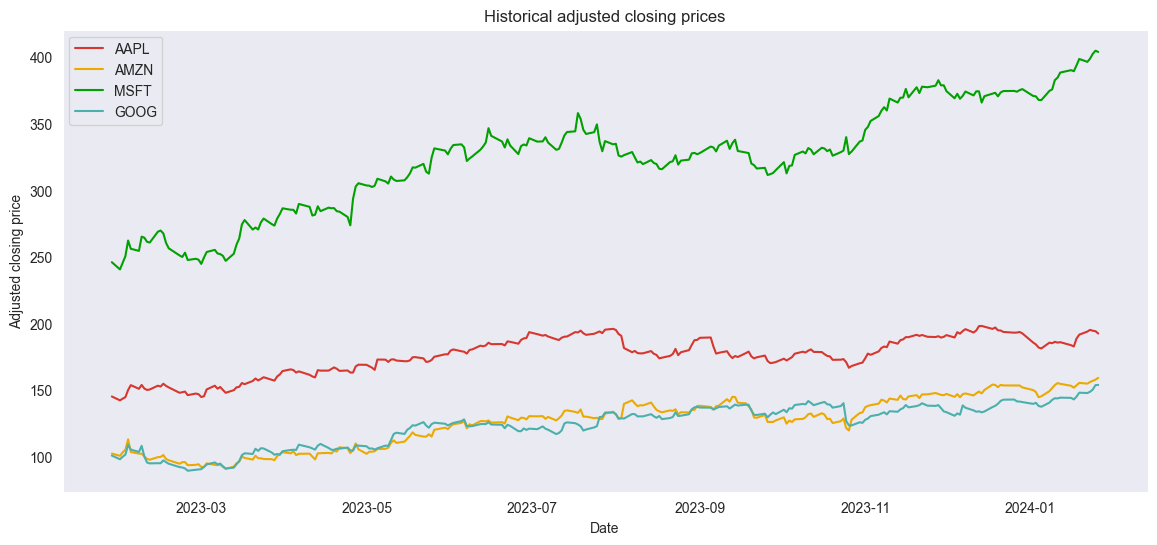

In [25]:
plt.figure(figsize = (14, 6));

sns.lineplot(data = AAPL['Adj Close'], color = company_colours['AAPL'], label = 'AAPL', linewidth = 1.5)
sns.lineplot(data = AMZN['Adj Close'], color = company_colours['AMZN'], label = 'AMZN', linewidth = 1.5)
sns.lineplot(data = MSFT['Adj Close'], color = company_colours['MSFT'], label = 'MSFT', linewidth = 1.5)
sns.lineplot(data = GOOG['Adj Close'], color = company_colours['GOOG'], label = 'GOOG', linewidth = 1.5)

plt.title('Historical adjusted closing prices')
plt.xlabel('Date')
plt.ylabel('Adjusted closing price');

<a name="trading_volume"></a>
### 3.2. Trading volume

Trading volume

Average trading volume (trailing 12 months) for APPLE: 58126519 shares.
Average trading volume (trailing 12 months) for AMAZON: 56659883 shares.
Average trading volume (trailing 12 months) for GOOGLE: 25009614 shares.
Average trading volume (trailing 12 months) for MICROSOFT: 26908975 shares.


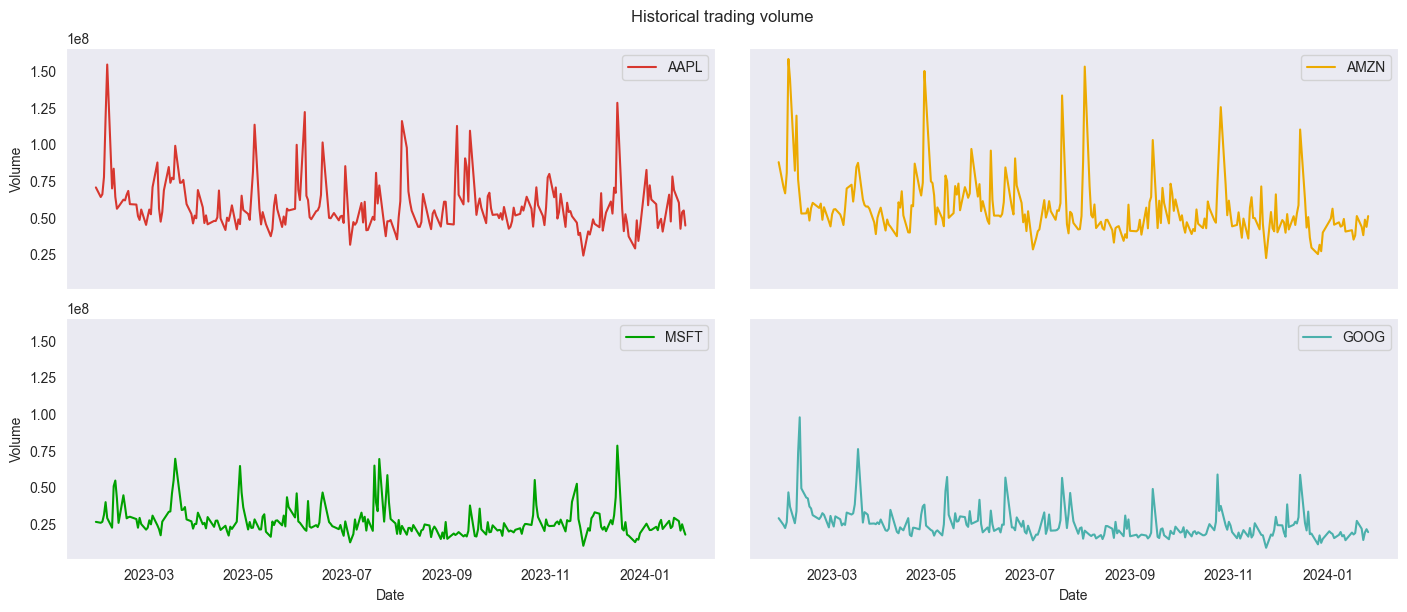

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 6), sharey = True, sharex = True)
plt.suptitle('Historical trading volume')
plt.tight_layout()

plt.subplot(2, 2, 1)
sns.lineplot(data = AAPL['Volume'], color = company_colours['AAPL'], label = 'AAPL', linewidth = 1.5)

plt.subplot(2, 2, 2)
sns.lineplot(data = AMZN['Volume'], color = company_colours['AMZN'], label = 'AMZN', linewidth = 1.5)

plt.subplot(2, 2, 3)
sns.lineplot(data = MSFT['Volume'], color = company_colours['MSFT'], label = 'MSFT', linewidth = 1.5)

plt.subplot(2, 2, 4)
sns.lineplot(data = GOOG['Volume'], color = company_colours['GOOG'], label = 'GOOG', linewidth = 1.5)

print(f'Average trading volume (trailing 12 months) for APPLE: {AAPL['Volume'].mean():.0f} shares.')
print(f'Average trading volume (trailing 12 months) for AMAZON: {AMZN['Volume'].mean():.0f} shares.')
print(f'Average trading volume (trailing 12 months) for GOOGLE: {GOOG['Volume'].mean():.0f} shares.')
print(f'Average trading volume (trailing 12 months) for MICROSOFT: {MSFT['Volume'].mean():.0f} shares.')

In terms of the volume of shares traded, Apple and Amazon surpassed Microsoft and Google by almost twice.  


<a name="moving_average"></a>
### 3.3. Moving average

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

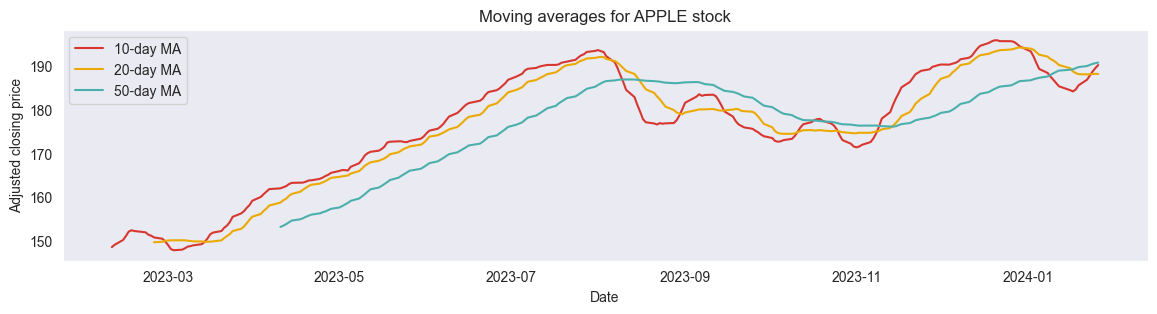

In [27]:
AAPL['MA 10 days'] = AAPL['Adj Close'].rolling(window = 10).mean()
AAPL['MA 20 days'] = AAPL['Adj Close'].rolling(window = 20).mean()
AAPL['MA 50 days'] = AAPL['Adj Close'].rolling(window = 50).mean()

plt.figure(figsize = (14, 3))

sns.lineplot(data = AAPL['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)

plt.title('Moving averages for APPLE stock')
plt.xlabel('Date')
plt.ylabel('Adjusted closing price');

In [28]:
'''
stocks = ['AAPL', 'AMZN', 'GOOG', 'MSFT']

for company in stocks:
    company['MA 10 days'] = company['Close'].rolling(window=10).mean()
    company['MA 20 days'] = company['Close'].rolling(window=20).mean()
    company['MA 50 days'] = company['Close'].rolling(window=50).mean()

THIS X WORK COS when you iterate over the keys of the dictionary using for company in stocks:, company is a string (the stock symbol), not the actual dataframe

If stocks is a list of stock symbols, and you have individual dataframes with names like 'AAPL', 'AMZN', 'GOOG', and 'MSFT', you should use those dataframes directly. The use of globals()[stock_symbol] dynamically retrieves the dataframe associated with each stock symbol.

'''    

"\nstocks = ['AAPL', 'AMZN', 'GOOG', 'MSFT']\n\nfor company in stocks:\n    company['MA 10 days'] = company['Close'].rolling(window=10).mean()\n    company['MA 20 days'] = company['Close'].rolling(window=20).mean()\n    company['MA 50 days'] = company['Close'].rolling(window=50).mean()\n\nTHIS X WORK COS when you iterate over the keys of the dictionary using for company in stocks:, company is a string (the stock symbol), not the actual dataframe\n\nIf stocks is a list of stock symbols, and you have individual dataframes with names like 'AAPL', 'AMZN', 'GOOG', and 'MSFT', you should use those dataframes directly. The use of globals()[stock_symbol] dynamically retrieves the dataframe associated with each stock symbol.\n\n"

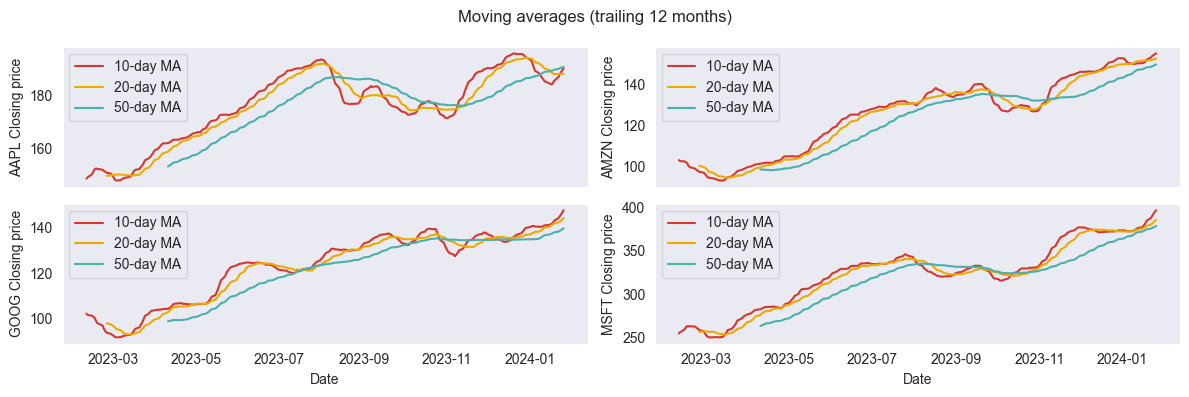

In [29]:
for stock_symbol in stocks:
    df = globals()[stock_symbol]
    df['MA 10 days'] = df['Adj Close'].rolling(window=10).mean()
    df['MA 20 days'] = df['Adj Close'].rolling(window=20).mean()
    df['MA 50 days'] = df['Adj Close'].rolling(window=50).mean()

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 4), sharex = True)
plt.suptitle('Moving averages (trailing 12 months)')
plt.xlabel('Date')

plt.subplot(2, 2, 1)
sns.lineplot(data = AAPL['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('AAPL Closing price')

plt.subplot(2, 2, 2)
sns.lineplot(data = AMZN['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = AMZN['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = AMZN['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('AMZN Closing price')

plt.subplot(2, 2, 3)
sns.lineplot(data = GOOG['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = GOOG['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = GOOG['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('GOOG Closing price')

plt.subplot(2, 2, 4)
sns.lineplot(data = MSFT['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = MSFT['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = MSFT['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('MSFT Closing price')

plt.tight_layout()

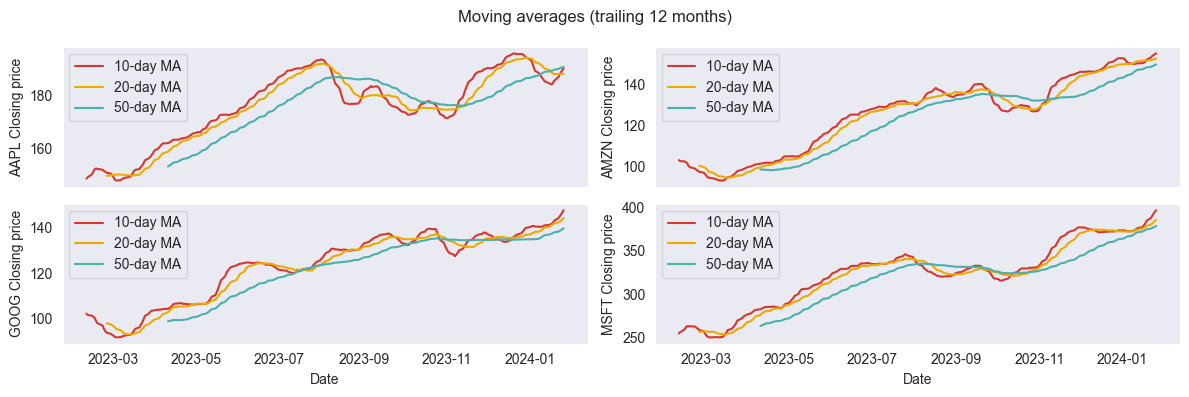

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4), sharex=True)
plt.suptitle('Moving averages (trailing 12 months)')
plt.xlabel('Date')

for i, stock_symbol in enumerate(stocks, start = 1):
    df = globals()[stock_symbol]
    df['MA 10 days'] = df['Adj Close'].rolling(window=10).mean()
    df['MA 20 days'] = df['Adj Close'].rolling(window=20).mean()
    df['MA 50 days'] = df['Adj Close'].rolling(window=50).mean()

    plt.subplot(2, 2, i)
    sns.lineplot(data=df['MA 10 days'], color='#d7372f', label='10-day MA', linewidth=1.5)
    sns.lineplot(data=df['MA 20 days'], color='#ecaa01', label='20-day MA', linewidth=1.5)
    sns.lineplot(data=df['MA 50 days'], color='#4bb0ac', label='50-day MA', linewidth=1.5)
    plt.ylabel(f'{stock_symbol} Closing price')

plt.tight_layout()

<a name="daily_returns"></a>
### 3.4. Daily returns

Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

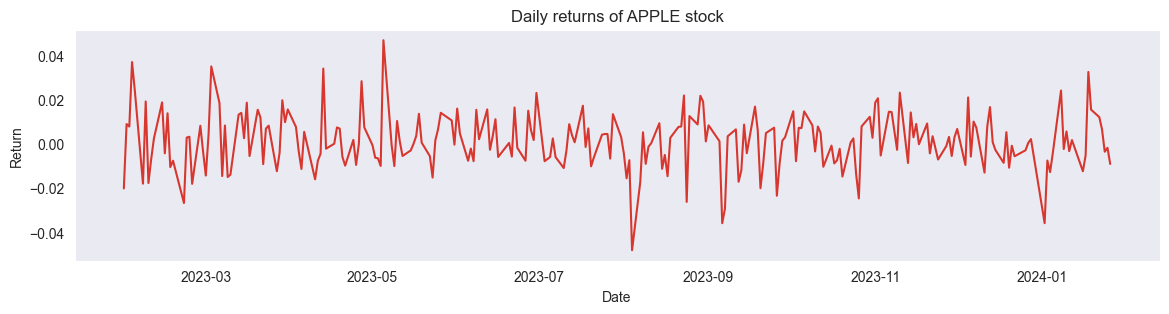

In [31]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

plt.figure(figsize = (14, 3));
sns.lineplot(
    data = AAPL['Daily Return'],
    color = company_colours['AAPL'])
plt.title('Daily returns of APPLE stock')
plt.xlabel('Date')
plt.ylabel('Return');

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

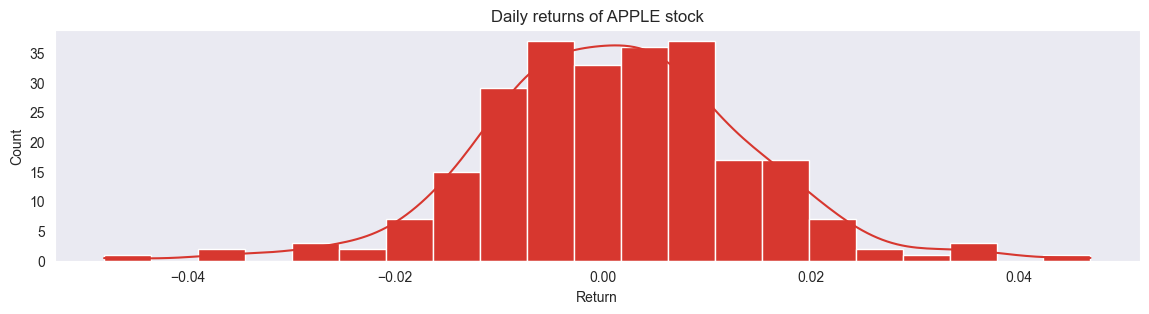

In [32]:
plt.figure(figsize = (14, 3));

sns.histplot(
    data = AAPL['Daily Return'],
    alpha = 1,
    color = company_colours['AAPL'],
    kde = True)

plt.title('Daily returns of APPLE stock')
plt.xlabel('Return');

In [33]:
all_close = pd.concat([AAPL['Adj Close'], AMZN['Adj Close'], GOOG['Adj Close'], MSFT['Adj Close']], axis = 1)
all_close.columns = ['AAPL', 'AMZN', 'GOOG', 'MSFT']
all_close

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-27,145.118835,102.239998,100.709999,245.978943
2023-01-30,142.205139,100.550003,97.949997,240.576828
2023-01-31,143.487961,103.129997,99.870003,245.632004
2023-02-01,144.621628,105.150002,101.430000,250.528595
2023-02-02,149.981689,112.910004,108.800003,262.274445
...,...,...,...,...
2024-01-22,193.889999,154.779999,147.710007,396.510010
2024-01-23,195.179993,156.020004,148.679993,398.899994
2024-01-24,194.500000,156.869995,150.350006,402.559998


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

Now we can compare the daily percentage return of two stocks to check how correlated.

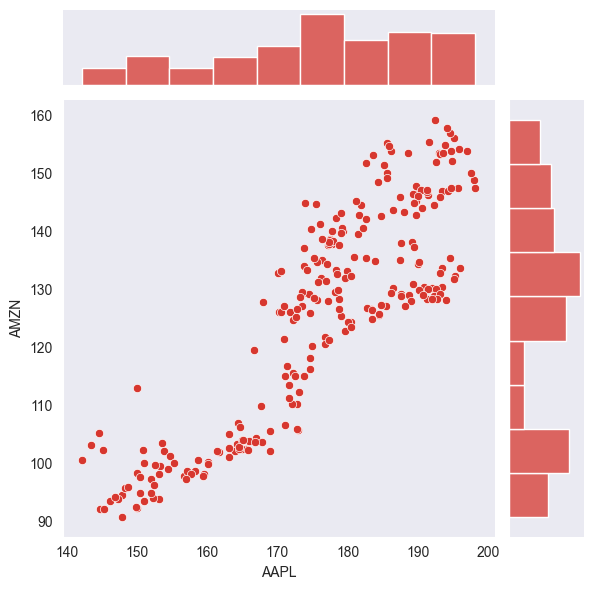

In [34]:
sns.jointplot(
    data = all_close,
    x = 'AAPL',
    y = 'AMZN',
    alpha = 1,
    color = '#d7372f');

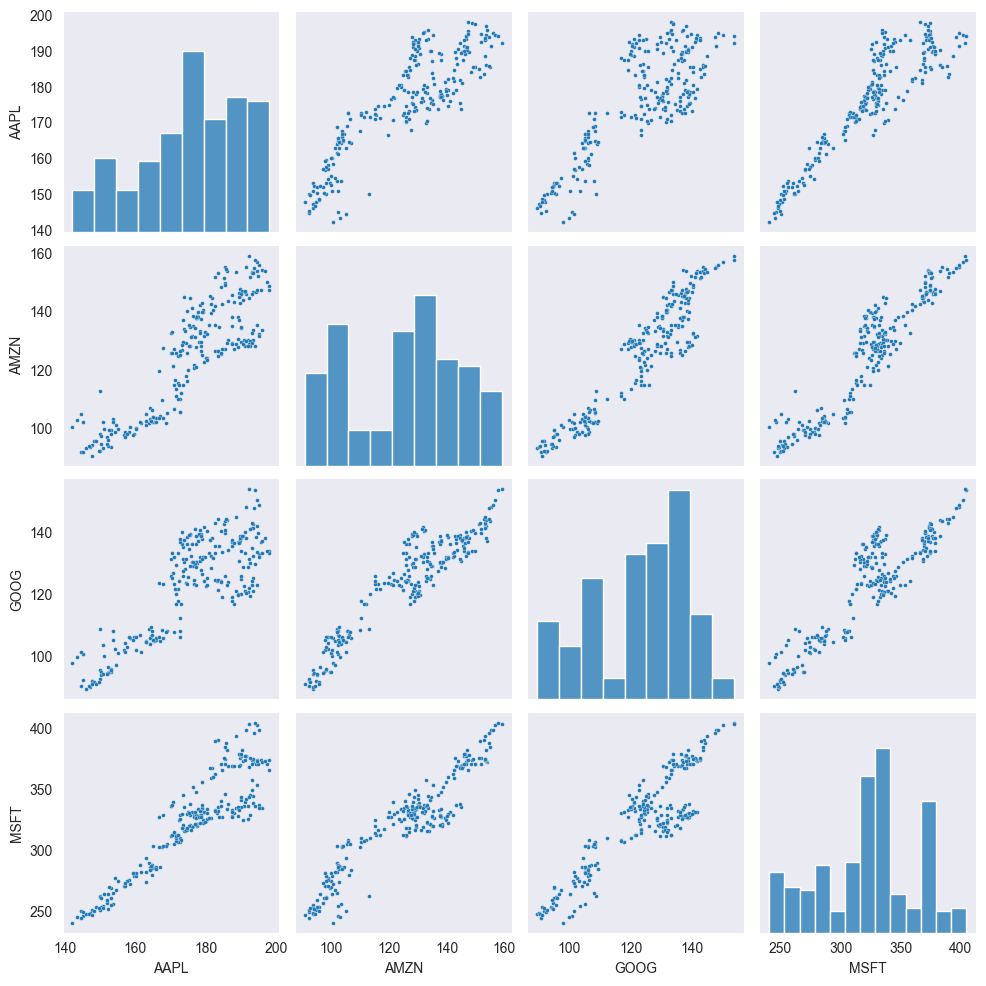

In [35]:
sns.pairplot(
    data = all_close,
    plot_kws = {'s': 8});

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

<Axes: >

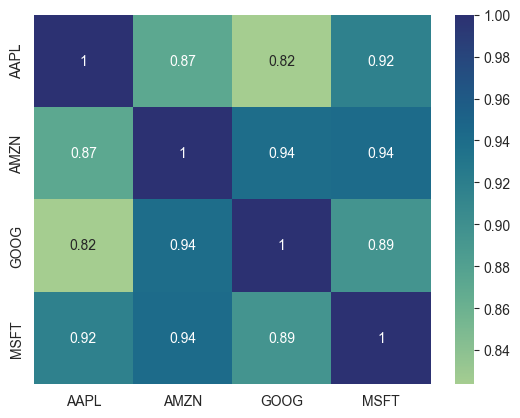

In [36]:
# Compute the correlation matrix
corr = all_close.corr()
sns.heatmap(corr, annot = True, cmap = 'crest')

We've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

<a name="var"></a>
## 4. Risk analysis - Value at Risk

<a name="historical"></a>
### 4.1. Historical approach

Value at Risk - historical method

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

In [37]:
all_returns = all_close.copy()

for column in ['AAPL', 'AMZN', 'GOOG', 'MSFT']:
    all_returns[column] = all_returns[column].pct_change()

all_returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-27,NaN,NaN,NaN,NaN
2023-01-30,-0.020078,-0.016530,-0.027405,-0.021962
2023-01-31,0.009021,0.025659,0.019602,0.021013
2023-02-01,0.007901,0.019587,0.015620,0.019935
2023-02-02,0.037063,0.073799,0.072661,0.046884
...,...,...,...,...
2024-01-22,0.012163,-0.003605,-0.001757,-0.005418
2024-01-23,0.006653,0.008011,0.006567,0.006028
2024-01-24,-0.003484,0.005448,0.011232,0.009175


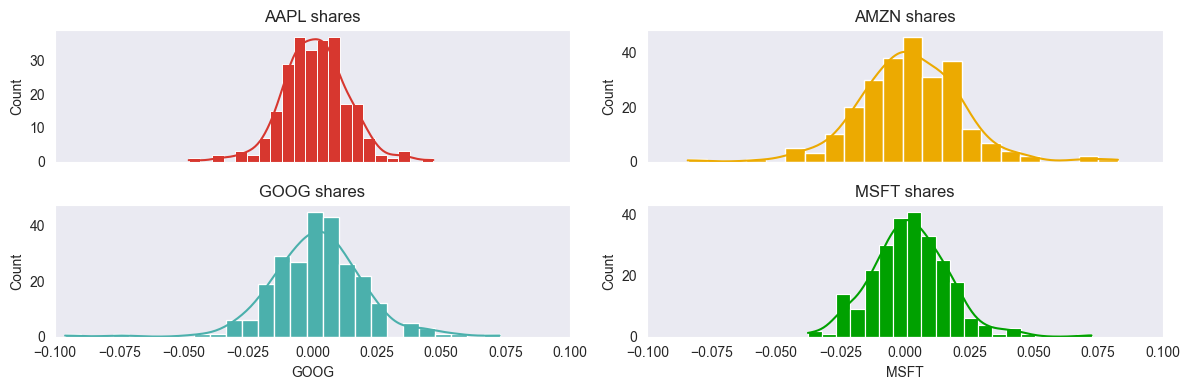

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 4), sharex = True)
plt.xlim(left = -0.1, right = 0.1)
plt.ylabel('Count')

for i, stock_symbol in enumerate(stocks, start = 1):
    plt.subplot(2, 2, i)
    plt.title(f'{stock_symbol} shares')
    sns.histplot(data = all_returns[stock_symbol], alpha = 1, color = company_colours[stock_symbol], kde = True)

plt.tight_layout()

Stock:            AAPL
VaR method:       Historical
Current price:    $192.42
Loss will not exceed:
   *   $2.60 per share (90% confidence)
   *   $3.40 per share (95% confidence)
   *   $6.89 per share (99% confidence)


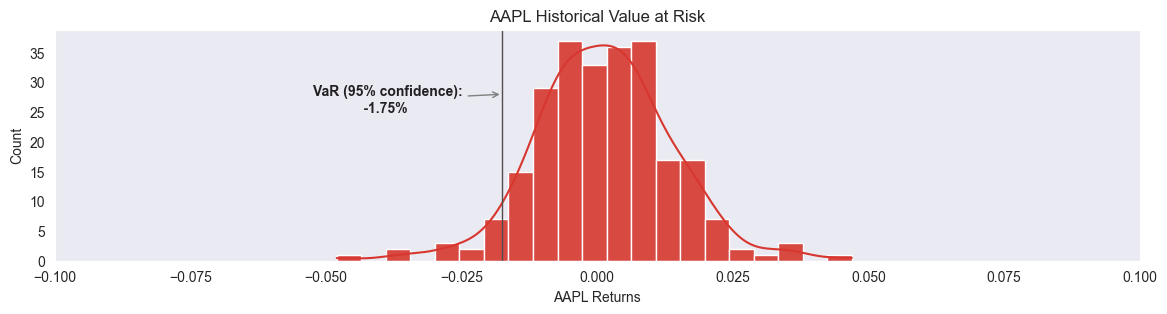

In [39]:
def VaR_historical(company):
    """
    Computes Value at Risk for a company's returns at 3 conventional confidence levels & produce a histogram.
    """
    alpha = [0.1, 0.05, 0.01]
    current_price = all_close[company].sort_index(ascending = False).iloc[0]
    var_historical = []
    print(f'Stock:            {company}')
    print('VaR method:       Historical')
    print(f'Current price:    ${current_price:.2f}')
    print(f'Loss will not exceed:')
    for i in alpha:
        loss = all_returns[company].quantile(i)
        nearest_higher = all_returns.loc[all_returns[company] < loss, company].sort_values(ascending = False).iloc[0]
        print(f'   *   ${-nearest_higher*current_price:.2f} per share ({(1-i)*100:.0f}% confidence)')
        var_historical.append({
            'Confidence': f'{i*100:.0f}%',
            'Loss%': loss,
            'Nearest higher': nearest_higher
        })
    perc_95 = var_historical[1]['Loss%']   
    plt.figure(figsize = (14, 3))
    sns.histplot(data = all_returns[company], color = company_colours[company], alpha = 0.9, kde = True)
    plt.axvline(x = perc_95, color = '#564c4d', linewidth = 1)
    plt.annotate(f'VaR (95% confidence):\n             {perc_95*100:.2f}%', xy = (perc_95, 28), weight = 'bold', color = '#232023',
        xytext = (perc_95-0.035, 25), fontsize = 10, arrowprops = dict(arrowstyle = "->", color = '#808080'))
    plt.xlim(left = -0.1, right = 0.1)
    plt.xlabel(f'{company} Returns')
    plt.title(f'{company} Historical Value at Risk')

VaR_historical('AAPL')

<a name="parametric"></a>
### 4.2. Parametric approach

The main drawback of the parametric approach is that real world returns usually have a distribution with “fat tails” (high kurtosis).

https://medium.com/analytics-vidhya/value-at-risk-with-python-4e3409e1c23d

The Normal Distribution is not necessarily the best way to describe returns. However, it is a very good way to picture the concepts, and it is a good starting point for us to elaborate on more complex and realistic scenarios.

The main drawback of the parametric approach is that real world returns usually have a distribution with “fat tails” (high kurtosis).

The Parametric Model estimates VaR directly from the Standard Deviation of portfolio returns. It assumes that risk factor returns are normal (so risk factor levels are lognormal) and that portfolio returns are linear functions of the risk factors, and hence normal as well. The last assumption makes it easy to derive the formula for the portfolio distribution from the security distribution, without having to generate any distributions explicitly

The Parametric method is accurate for linear assets, but less accurate for options and other non­linear derivatives. It also becomes less accurate at longer horizons. Parametric calculations are faster than either simulation method and don't need extensive historical data (only the correlation and volatility matrices are needed). The method is not recommended for long horizons, for portfolios with many options, or for assets with skewed distributions.

Variance-Covariance approach. The Variance-covariance is a parametric method which assumes that the returns are normally distributed.

In [40]:
def VaR_parametric(company): 
    """
    Computes Value at Risk for a company's returns at 3 conventional confidence levels & produce a histogram.
    """
    alpha = [0.1, 0.05, 0.01]
    current_price = all_close[company].sort_index(ascending = False).iloc[0]
    var_parametric = []  
    print(f'Stock:            {company}')
    print('VaR method:       Parametric') 
    print(f'Current price:    ${current_price:.2f}')
    print(f'Loss will not exceed:')
    for i in alpha:
        mean = np.mean(all_returns[company])
        stdev = np.std(all_returns[company], axis = 0)
        z_score = norm.ppf(1 - i)
        var = -z_score * stdev
        print(f'   *   ${-var * current_price:.2f} per share ({(1-i)*100:.0f}% confidence)')
        var_parametric.append({
            'Confidence': f'{(1 - i) * 100:.0f}%',
            'Loss%': var
        })

VaR_parametric('AMZN')

Stock:            AMZN
VaR method:       Parametric
Current price:    $159.12
Loss will not exceed:
   *   $4.07 per share (90% confidence)
   *   $5.23 per share (95% confidence)
   *   $7.40 per share (99% confidence)


monte carlo

Monte Carlo Simulation is similar to Historical Simulation in that it estimates VaR by simulating risk factor scenarios and revaluing all positions in a portfolio for each trial (i.e., full re­pricing). However, instead of generating risk factor scenarios from the historical distribution, it generates them from a lognormal distribution. Thus, the distribution assumption for risk factors is the same as in the parametric model, but the method for generating the price distribution of the security is different. The method accounts for all non­linearities in portfolio positions. As in the parametric method, volatilities and correlations for the risk factors are calculated directly from time series data over user­specified start and end dates. Users may also specify an optional decay factor, as well as the number of simulations to perform per analysis. This method accurately prices all types of complex non­linear positions as well as simple linear instruments. It also provides a full distribution of potential portfolio gains and losses (which need not be symmetrical), but does not take into account any non­normality in the underlying factors (e.g. fat­tails, mean­reversion, although Monte Carlo Simulation quantifies fat­tailed risk only if scenarios are generated from appropriate conditions).

<a name="montecarlo"></a>
### 4.3. Monte Carlo simulation approach


* take in a stocks starting price
* uses a loop to simulate the stock price for each day in the specified range (1 to days).

For each day:
* A random shock is generated using a normal distribution. This represents the unpredictable component of stock price movements.
* A drift is calculated based on the mean of daily returns. The drift represents the average expected movement in the stock price.
* The new stock price for the day is calculated using the previous day's price, drift, and shock

The function returns the array price, which contains the simulated stock prices for each day.

=> the function models the future stock prices by considering both a predictable component (drift) and an unpredictable component (shock) for each day. This process is repeated for the specified number of days, and the resulting array represents a possible trajectory of the stock prices based on the provided parameters.

The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. 

In [41]:
def price_montecarlo(company, days): 
    '''
    Purpose: simulate the price of a stock over the course of given days
    Input: company, days
    '''
    initial_price = all_close[company].sort_index(ascending = True).iloc[0]
    results = pd.DataFrame(columns=['Time', 'Simulated price', 'Drift', 'Shock'])
    results.loc[0] = [0, initial_price, 0, 0]

    mean = np.mean(all_returns[company])
    stdev = np.std(all_returns[company], axis = 0)
    delta_t = 1 / days

    for i in range(1, days):
        results.loc[i, 'Time'] = i
        results.loc[i, 'Drift'] = mean * delta_t
        results.loc[i, 'Shock'] = np.random.normal(mean * delta_t, stdev * np.sqrt(delta_t))
        results.loc[i, 'Simulated price'] = results['Simulated price'].iloc[i - 1] + (results['Simulated price'].iloc[i - 1] * (results['Drift'].iloc[i] + results['Shock'].iloc[i]))

    return results

price_montecarlo('AMZN', 252)

,Time,Simulated price,Drift,Shock
0,0.0,102.239998,0.000000,0.000000
1,1.0,102.426157,0.000008,0.001813
2,2.0,102.260851,0.000008,-0.001622
3,3.0,102.250783,0.000008,-0.000106
4,4.0,102.231361,0.000008,-0.000198
...,...,...,...,...
247,247.0,100.695157,0.000008,0.000238
248,248.0,100.496133,0.000008,-0.001984
249,249.0,100.322169,0.000008,-0.001739
250,250.0,100.324444,0.000008,0.000015


* Next we're gonna run that simulation 20 times.
* Simulate the future stock prices using the Monte Carlo simulation function.
* Store the final stock price from that simulation in the simulations list.
* After running all simulations, calculate the 1% quantile. This is a value below which 1% of the simulated stock prices fall. Essentially, it gives you an idea of the potential downside risk in the simulated scenarios at a 99% confidence level.

Text(0.5, 1.0, 'Monte Carlo simulation for AAPL stock price, 100 repetitions')

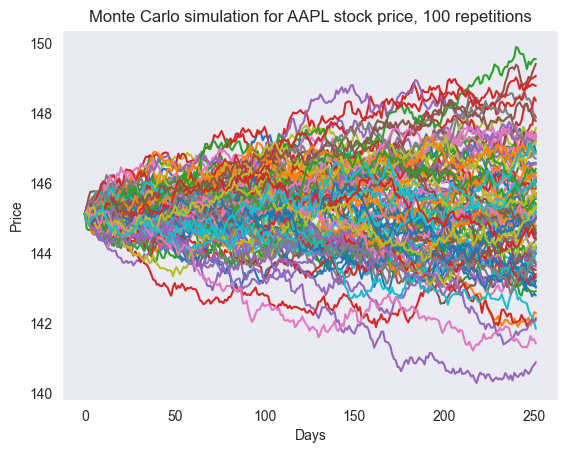

In [42]:
# A visualisation of the price simulations using Monte Carlo over a low number of repetitions
company = 'AAPL'
days = 252
rep = 100

for r in range(rep):
    sns.lineplot(
        data = price_montecarlo(company, days),
        y = 'Simulated price',
        x = 'Time'
    )
plt.xlabel("Days")
plt.ylabel("Price")
plt.title(f'Monte Carlo simulation for {company} stock price, {rep} repetitions')

Define a function that would return the predicted price for a much larger simulation sample size, then compute the Value at Risk.

Stock:            AAPL
VaR method:       Monte Carlo
Current price:    $192.42
Loss will not exceed:
   *   $49.48 per share (90% confidence)
   *   $50.25 per share (95% confidence)
   *   $51.37 per share (99% confidence)


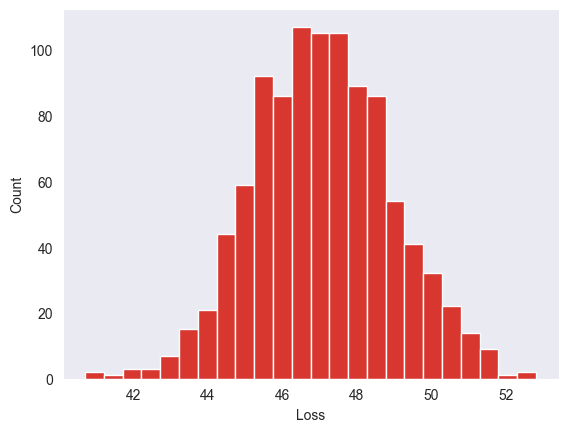

In [43]:
def VaR_montecarlo(company, days, rep):
    sim_results = []
    current_price = all_close['AAPL'].sort_index(ascending = False).iloc[0]
    initial_price = all_close['AAPL'].sort_index(ascending = True).iloc[0]

    for i in range(1, rep+1):
        prediction = price_montecarlo('AAPL', days).iloc[-1]['Simulated price']
        sim_results.append({
            'Simulation': i,
            'Prediction': prediction,
            'Loss': current_price - prediction
        })
        sim_results_df = pd.DataFrame(sim_results)

    alpha = [0.1, 0.05, 0.01]
    print(f'Stock:            {company}')
    print('VaR method:       Monte Carlo') 
    print(f'Current price:    ${current_price:.2f}')
    print(f'Loss will not exceed:')
    for i in alpha:
        cutoff = sim_results_df['Prediction'].quantile(i)
        var = current_price - cutoff
        print(f'   *   ${var:.2f} per share ({(1-i)*100:.0f}% confidence)')

    sns.histplot(
        data = sim_results_df,
        x = 'Loss',
        color = company_colours[company],
        alpha = 1
    )

VaR_montecarlo('AAPL', 252, 1000)

<a name="recommendations"></a>
## 5. Recommendations for future work 
1. Consider **Weighted Moving Average Methods** for VaR computation

Unlike the VaR methods used in this project, which assume uniform weights for all historical returns, weighted approaches such as the Exponential Weighted Moving Average Method (EWMA) assigns non-uniform weights, with a preference for more recent returns. The most recent returns have higher weights because they influence "today's" return more heavily than returns further in the past. This method proves advantageous in capturing varying influences of past returns on the current risk assessment. 

2. Include **VaR backtesting**

Various forms of backtesting could be used to assess and enhance the reliability of VaR models. One suggested approach is the Kupiec's proportion-of-failures (POF) test, which is a simple and straihtforward statistical method that evaluates the accuracy of VaR predictions. 

Additionally, consider including a visual represtation of simulated VaR over an extended time horizon of all VaR approaches on the same graph. This would allow for a more comprehensive comparison of models.

*Example: A combined plot depicting the returns and VaR estimates, all displayed at the 95% confidence level.*

![Alt text](image-2.png)